Import de pandas et du CSV 

In [3]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Affichage des possibilités de réponses pour les colonnes sex, smoker et region

In [4]:
print(df.sex.unique())
print(df.smoker.unique())
print(df.region.unique())


['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


Encodage pour chaque valeurs unique de la série avec une clé valeur (0 et 1). Ojectif avoir un clé unique pour chaque label unique

In [6]:
from sklearn.preprocessing import LabelEncoder

animals       = pd.Series(['dog', 'cat', 'dog', 'dog', 'cat'])
label_encoder = LabelEncoder()
label_encoder.fit(animals.unique())
encoded_animals = label_encoder.transform(animals)

print('Classes', label_encoder.classes_)
print('Original series\n', animals)
print('Encoded series', encoded_animals)

Classes ['cat' 'dog']
Original series
 0    dog
1    cat
2    dog
3    dog
4    cat
dtype: object
Encoded series [1 0 1 1 0]


Transformation des colonnes sex et smoker en valeur numérique unique

In [7]:
col_to_encode  = ['sex', 'smoker']
col_to_encoder = {}

for col in col_to_encode:
  encoder             = LabelEncoder().fit(df[col].unique())
  df[col]             = encoder.transform(df[col])
  col_to_encoder[col] = encoder

print(df)

      age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


Attribut un 1 ou un 0 à une catégorie si le résultat correspond à la catégorie, plus facile à utiliser pour des nods

In [8]:
animals = pd.Series([
  'dog', 'cat', 'dog', 'dog', 'cat',
  'goat', 'cat', 'alligator'
])
one_hot = pd.get_dummies(animals, prefix = 'animal')
print(one_hot)

   animal_alligator  animal_cat  animal_dog  animal_goat
0                 0           0           1            0
1                 0           1           0            0
2                 0           0           1            0
3                 0           0           1            0
4                 0           1           0            0
5                 0           0           0            1
6                 0           1           0            0
7                 1           0           0            0


Transformation de variable categoriel region en tableau séparent chaque possibilité

In [9]:
df = pd.get_dummies(df, columns = ['region'], prefix = 'region')
print(df)

      age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400                 0   
1      18    1  33.770         1       0   1725.55230                 0   
2      28    1  33.000         3       0   4449.46200                 0   
3      33    1  22.705         0       0  21984.47061                 0   
4      32    1  28.880         0       0   3866.85520                 0   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    1  30.970         3       0  10600.54830                 0   
1334   18    0  31.920         0       0   2205.98080                 1   
1335   18    0  36.850         0       0   1629.83350                 0   
1336   21    0  25.800         0       0   2007.94500                 0   
1337   61    0  29.070         0       1  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                

Comptage du nombre de fois un il y un enfants ou deux, etc



In [10]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Affichage de l'indice de masse corporel des hommes(0) et des femmes(1)

---



1    676
0    662
Name: sex, dtype: int64

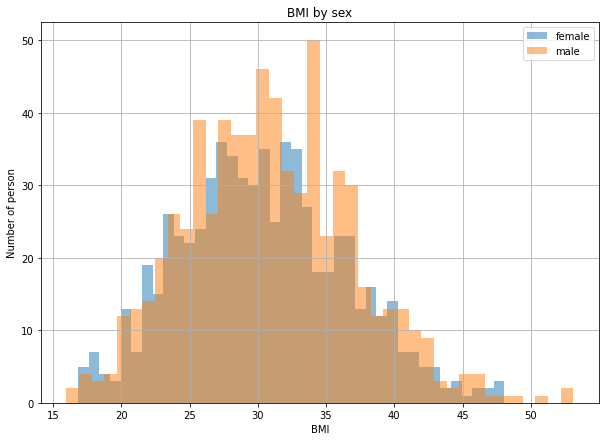

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
for sex_id, df_sex in df.groupby('sex'):
  label = col_to_encoder['sex'].classes_[sex_id]
  df_sex.bmi.hist(bins = 40, label = label, alpha = .5)
plt.title('BMI by sex')
plt.xlabel('BMI')
plt.ylabel('Number of person')
plt.legend()

df.sex.value_counts()


Différence de charge hospitalière par région

In [13]:
df.groupby([
  'region_northeast', 'region_northwest',
  'region_southeast', 'region_southwest'
]).charges.mean()

region_northeast  region_northwest  region_southeast  region_southwest
0                 0                 0                 1                   12346.937377
                                    1                 0                   14735.411438
                  1                 0                 0                   12417.575374
1                 0                 0                 0                   13406.384516
Name: charges, dtype: float64

Charge hospitalière des fumeur face au non fumeur (1 : fumeur, 0 : nom fumeur)

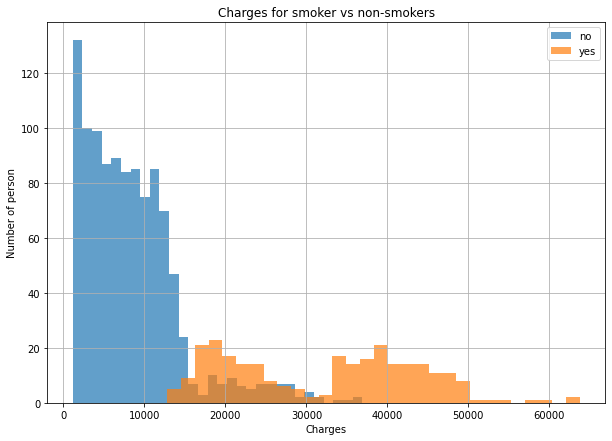

In [14]:
plt.figure(figsize = (10, 7))
for smoker_id, df_smoker in df.groupby('smoker'):
  label = col_to_encoder['smoker'].classes_[smoker_id]
  df_smoker.charges.hist(bins = 30, label = label, alpha = .7)
plt.title('Charges for smoker vs non-smokers')
plt.xlabel('Charges')
plt.ylabel('Number of person')
plt.legend()

Répartition de la charge hospitalière par l'age

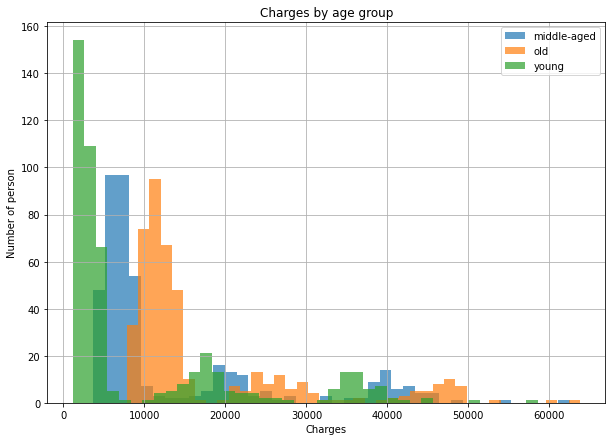

In [15]:
first_tercile, second_tercile = df.age.quantile([1/3, 2/3])
age_group = []
for age in df.age:
  if age <= first_tercile:
    age_group.append('young')
  elif age <= second_tercile:
    age_group.append('middle-aged')
  else:
    age_group.append('old')
df['age_group'] = age_group

plt.figure(figsize = (10, 7))
for age_group, df_age_group in df.groupby('age_group'):
  df_age_group.charges.hist(bins = 40, label = age_group, alpha = .7)
plt.title('Charges by age group')
plt.xlabel('Charges')
plt.ylabel('Number of person')
plt.legend()

Même chose avec une autre façon de faire

C:\Users\matheo.epie\AppData\Local\Temp\ipykernel_45032\209747701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age_group.loc[df.age <= first_tercile] = 'young'
C:\Users\matheo.epie\AppData\Local\Temp\ipykernel_45032\209747701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age_group.loc[df.age > second_tercile] = 'old'


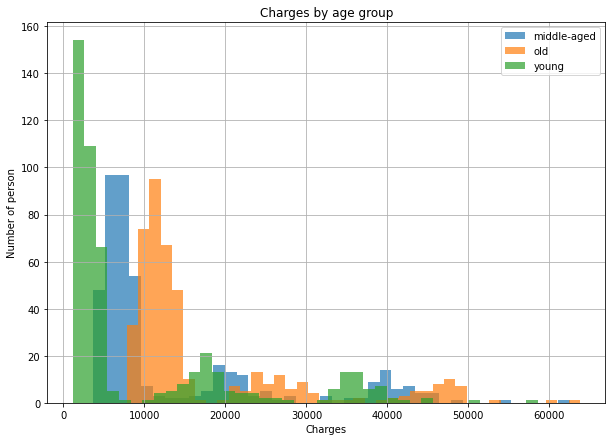

In [16]:
df['age_group'] = 'middle-aged'
first_tercile, second_tercile = df.age.quantile([1/3, 2/3])
df.age_group.loc[df.age <= first_tercile] = 'young'
df.age_group.loc[df.age > second_tercile] = 'old'

plt.figure(figsize = (10, 7))
for age_group, df_age_group in df.groupby('age_group'):
  df_age_group.charges.hist(bins = 40, label = age_group, alpha = .7)
plt.title('Charges by age group')
plt.xlabel('Charges')
plt.ylabel('Number of person')
plt.legend()

Même chose avec lindice de masse corporel

C:\Users\matheo.epie\AppData\Local\Temp\ipykernel_45032\1634859064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bmi_group.loc[df.bmi <= first_tercile] = 'low BMI'
C:\Users\matheo.epie\AppData\Local\Temp\ipykernel_45032\1634859064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bmi_group.loc[df.bmi > second_tercile] = 'high BMI'


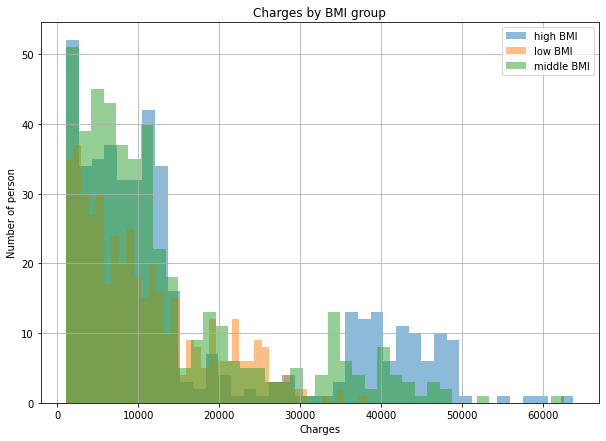

In [17]:
df['bmi_group'] = 'middle BMI'
first_tercile, second_tercile = df.bmi.quantile([1/3, 2/3])
df.bmi_group.loc[df.bmi <= first_tercile] = 'low BMI'
df.bmi_group.loc[df.bmi > second_tercile] = 'high BMI'

plt.figure(figsize = (10, 7))
for bmi_group, df_bmi_group in df.groupby('bmi_group'):
  df_bmi_group.charges.hist(bins = 40, label = bmi_group, alpha = .5)
plt.title('Charges by BMI group')
plt.xlabel('Charges')
plt.ylabel('Number of person')
plt.legend()


Matrice de correlation entre les différentes features

   age  sex     bmi  children  smoker  region_northeast  region_northwest  \
0   19    0  27.900         0       1                 0                 0   
1   18    1  33.770         1       0                 0                 0   
2   28    1  33.000         3       0                 0                 0   
3   33    1  22.705         0       0                 0                 1   
4   32    1  28.880         0       0                 0                 1   

   region_southeast  region_southwest    age_group   bmi_group  
0                 0                 1        young  middle BMI  
1                 1                 0        young    high BMI  
2                 1                 0        young  middle BMI  
3                 0                 0  middle-aged     low BMI  
4                 0                 0  middle-aged  middle BMI  
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


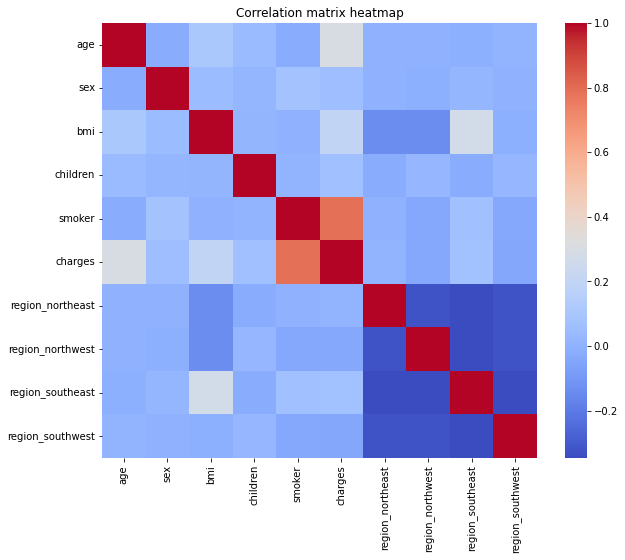

In [19]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 8))
plt.title('Correlation matrix heatmap')
correlation = df.corr()
sns.heatmap(
  data   = correlation,
  square = True,
  cmap   = 'coolwarm',
  ax     = ax
)

X = df.drop(['charges'], axis = 1)
y = df.charges
print(X.head())
print(y.head())

In [33]:
import torch

X = torch.tensor(X.values).float()
y = torch.tensor(y.values).float()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

train_dataset = TensorDataset(X_train, y_train)
test_dataset  = TensorDataset(X_test, y_test)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.